<Figure size 2000x1600 with 0 Axes>

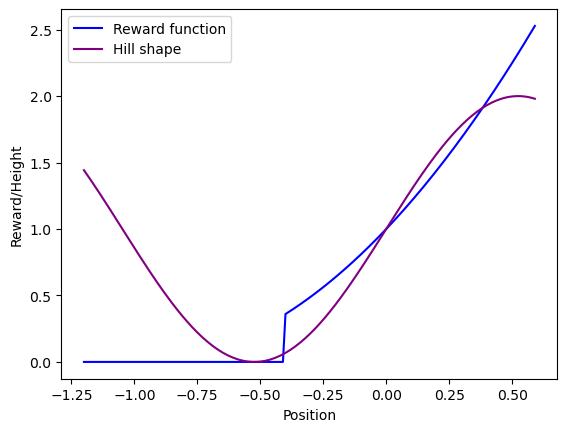

In [121]:
import numpy as np
import matplotlib.pyplot as plt

def reward_function(position):
    if position > -0.4:
        return (1+position)**2
    else:
        return 0

positions = np.arange(-1.2, 0.6, 0.01)

rewards = [reward_function(p) for p in positions]

def hill(x):
    return np.sin(3 * x)+1

fig = plt.figure(figsize=(20,16))
fig, ax = plt.subplots()
ax.plot(positions, rewards, label='Reward function', color='blue')
ax.plot(positions, hill(positions), label='Hill shape', color='purple')
ax.set_xlabel('Position')
ax.set_ylabel('Reward/Height')
ax.legend()

fig.savefig('original reward visual.svg', format='svg')

plt.show()



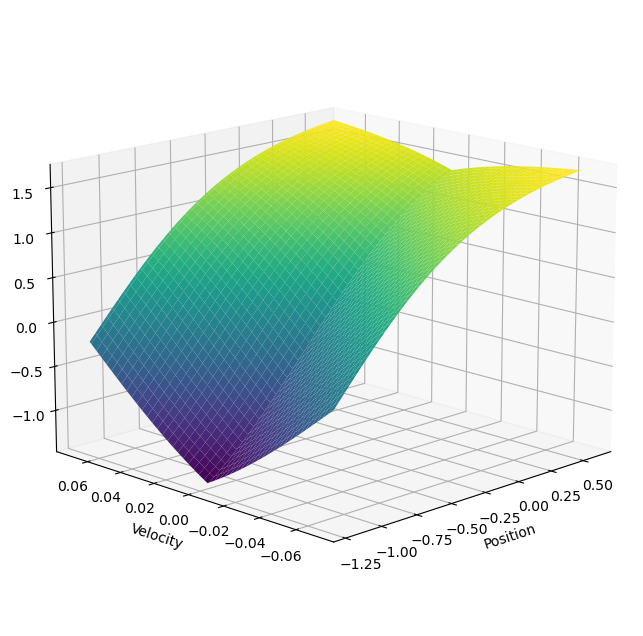

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def reward_function(position, velocity):
    reward = -0.2 + 2 * (math.tanh(abs(velocity*10) + (position+0.5)))
    return reward

positions = np.arange(-1.2, 0.6, 0.01)
velocities = np.arange(-0.07, 0.07, 0.001)

X, Y = np.meshgrid(positions, velocities)
Z = np.zeros_like(X)
# flipped indexing because the first index runs through rows of matrices,
# i.e. across the y axis values, while second index runs through columns,
# i.e. across the x axis values.
for i in range(len(velocities)):
    for j in range(len(positions)):
        Z[i,j] = reward_function(X[i,j], Y[i,j])

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('Reward', rotation=90)
ax.view_init(elev=15, azim=225)

fig.savefig('reward_function.svg', format='svg')
plt.show()

In [44]:
import gymnasium as gym
from tensorflow.keras.models import load_model

In [96]:
positions = np.linspace(-1.2, 0.6, 21)
velocities = np.linspace(-0.07, 0.07, 21)

In [97]:
X, Y = np.meshgrid(positions, velocities)

In [112]:
# change file here to load in different models
model = load_model("./MC_v3_data/03_06_21_54/model_human_03_06_21_54_394.h5")
# model = load_model("./MC_v3_data/previous_runs/03_01_23_01/model_plus_velocity_03_01_23_01_122.h5")

In [113]:
Z = np.zeros_like(X)
for i in range(len(velocities)):
    for j in range(len(positions)):
        # state = np.array([X[i,j], Y[i,j]])
        state = np.array([positions[i], velocities[j]])
        state = np.reshape(state, (1,2))
        act_values = model.predict(state, verbose=0)
        Z[i,j] = np.argmax(act_values[0])

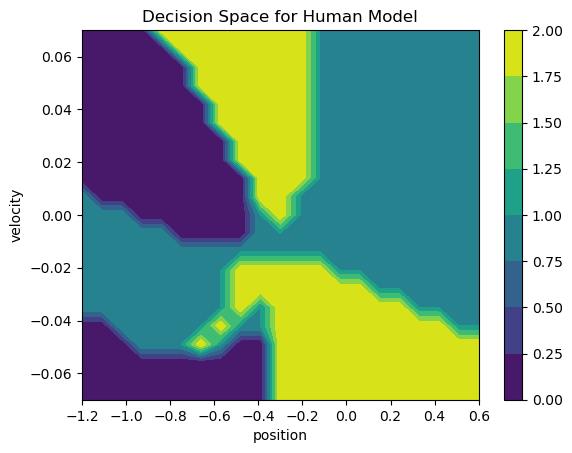

In [114]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_title('Decision Space for Human Model')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
fig.savefig('human decision visual.svg', format='svg')
plt.show()